In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
zooms = []
for idx in range(1, 101):
    img = nib.load(f"train_2/data/{idx:03d}.nii.gz")
    zooms.append(img.header.get_zooms())

zooms = np.array(zooms)

In [3]:
def round_mantissa(x, n):
    if x == 0:
        return 0
    s = 1 if x >= 0 else -1
    x = abs(x)
    a = math.floor(math.log2(x))
    x = x / 2 ** a
    assert 1.0 <= x < 2.0, x
    x = round(x * 2**n) / 2**n
    x = x * 2 ** a
    return s * x


# vectorize round_mantissa
round_mantissa_vec = np.vectorize(round_mantissa)

In [4]:
round_mantissa(0.5 + 0.25 + 0.125 - 1/16, 2)

0.75

In [5]:
man = np.array([1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875])
exp = np.arange(-15, 10)
nums = man[:, None] * 2.0**exp[None, :]
nums = nums.flatten()

for x in np.linspace(1e-3, 20, 100000):
    y = round_mantissa(x, 3)
    assert y == nums[np.argmin(np.abs(x - nums))], x

In [6]:
ns = np.arange(1, 20)
ks = [
    np.unique(round_mantissa_vec(zooms, n), axis=0).shape[0]
    for n in ns
]

(0.0, 6.0)

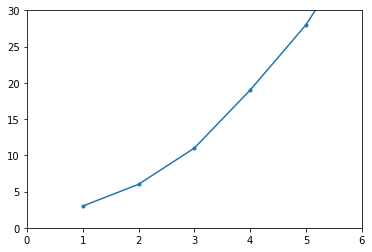

In [7]:
plt.plot(ns, ks, '.-')
plt.ylim(0, 30)
plt.xlim(0, 6)

In [9]:
ls = np.unique(round_mantissa_vec(zooms, 4), axis=0)
ls

array([[0.375   , 0.375   , 4.5     ],
       [0.375   , 0.375   , 4.75    ],
       [0.375   , 0.375   , 5.      ],
       [0.390625, 0.390625, 5.      ],
       [0.390625, 0.390625, 5.5     ],
       [0.40625 , 0.40625 , 4.5     ],
       [0.40625 , 0.40625 , 4.75    ],
       [0.40625 , 0.40625 , 5.      ],
       [0.421875, 0.421875, 4.5     ],
       [0.421875, 0.421875, 5.      ],
       [0.4375  , 0.4375  , 5.      ],
       [0.453125, 0.453125, 4.5     ],
       [0.453125, 0.453125, 5.      ],
       [0.46875 , 0.46875 , 5.      ],
       [0.484375, 0.484375, 4.75    ],
       [0.484375, 0.484375, 5.      ],
       [0.5     , 0.5     , 5.      ],
       [0.53125 , 0.53125 , 5.      ],
       [0.59375 , 0.59375 , 5.      ]])

In [10]:
ls.shape

(19, 3)